In [22]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, Var

matplotlib.style.use('classic')

In [23]:
data = pd.read_excel("Exercise4_Location_Planning_Data.xlsx",sheet_name="Task 4 - Steiner-Weber", header=1)
data

,Number,X,Y,demand,name
0,1,6,9,500,Cust1
1,2,19,3,500,Cust2
2,3,77,78,25,Cust3
3,4,13,13,500,Cust4
4,5,3,48,225,Cust5
5,6,83,2,100,Cust6
6,7,9,26,500,Cust7
7,8,61,66,200,Cust8
8,9,81,89,25,Cust9
9,10,52,68,100,Cust10


In [24]:
u = np.array(data["X"])
v = np.array(data["Y"])
b = np.array(data["demand"])

In [27]:
m = Model("Stein-Weber")
U = m.addVar(vtype = GRB.CONTINUOUS, name="U")
V = m.addVar(vtype = GRB.CONTINUOUS, name="V")
m.setObjective(sum(b[j]*b[j]*((U-u[j])**2+(V-v[j])**2) for j in range(100)))
m.optimize()
m.getAttr("X")


Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 6 physical cores, 6 logical processors, using up to 6 threads
Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x66894796
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [3e+08, 3e+08]
  QObjective range [1e+07, 1e+07]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective 5.81302384e+09


[25.32060606060606, 28.83490909090909]

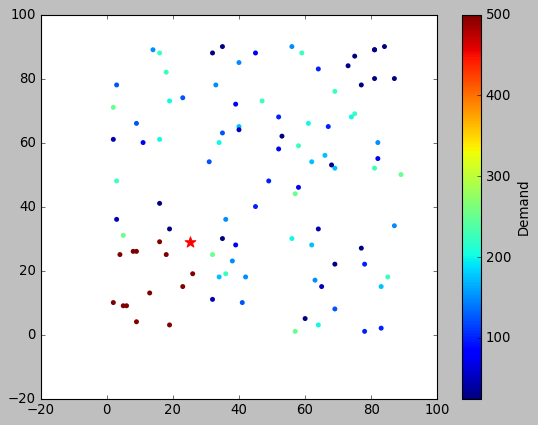

In [28]:
# plot given data
sc = plt.scatter("X", "Y", data=data, c="demand", linewidth=0)
# Add solution
plt.scatter(m.x[0],m.x[1], color = "red", marker="*", s=100)
# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Demand")